1. 행 열 정리 !!완!!
2. 년도별 이용자수 시각화
3. 이용자수 자치별로 더해서 자치구 내림차순 정리
4. 상위 5개구 하위 5개구 뽑아서 지도에 나타내기

년도별 상위 몇가지 구 뽑아내서.. 비교하기
-> 유지되면 그 지역은 안심 서비스를 강화할 필요가 있다

검거율이 낮은 자치구(7개) : 노원구, 동작구, 마포구, 서초구, 양천구, 영등포구, 용산구

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium

In [13]:
이용실적 = pd.read_excel('안심귀가스카우트이용현황(2015_2021).xlsx', sheet_name='이용실적')
이용실적 = pd.DataFrame(이용실적)
이용실적 = 이용실적.set_index('자치구')
이용실적

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
총계,233290,241838,322704,341162,350955,210278,177805
종로구,8861,6970,3789,1438,10097,11445,8586
중구,2935,4901,11110,11931,12658,8861,3570
용산구,4994,6355,8461,8979,9238,5749,2981
성동구,8043,13170,18766,19584,17510,10872,8518
광진구,6533,5990,6183,6206,6099,3215,5733
동대문구,5588,7259,13704,15771,20776,19420,19085
중랑구,8448,7815,8001,10163,14696,8015,6889
성북구,6789,7600,13486,14427,16836,7220,1647


In [14]:
이용실적['자치구별총계'] = 이용실적.sum(axis=1)

In [15]:
이용실적정렬 = 이용실적.sort_values(by=['자치구별총계'], ascending=False)
이용실적정렬최종 = 이용실적정렬.drop(이용실적정렬.index[0])
이용실적정렬최종.head(7)

,2015,2016,2017,2018,2019,2020,2021,자치구별총계
자치구,,,,,,,,
서초구,22185,15102,34498,51088,43556,9483,8265,184177
금천구,18323,17781,18509,18343,17946,12893,9745,113540
동작구,8350,15268,19935,18431,18766,14233,16761,111744
관악구,18463,14403,15918,16706,15730,10286,12780,104286
동대문구,5588,7259,13704,15771,20776,19420,19085,101603
송파구,24221,13297,11019,9401,9309,13992,19450,100689
성동구,8043,13170,18766,19584,17510,10872,8518,96463


In [21]:
스카우트인원 = pd.read_excel('안심귀가스카우트이용현황(2015_2021).xlsx', sheet_name='스카우트인원')
스카우트인원 = pd.DataFrame(스카우트인원)
스카우트인원 = 스카우트인원.set_index('자치구')
스카우트인원

,2015,2016,2017,2018,2019,2020,2021
자치구,,,,,,,
총계,420,420,443,452,452,500,500
종로구,19,21,11,11,11,14,14
중구,11,7,15,17,17,20,16
용산구,11,11,13,13,13,13,13
성동구,15,17,23,23,23,23,19
광진구,13,11,11,11,11,13,13
동대문구,11,13,21,21,21,21,17
중랑구,13,17,13,17,17,17,17
성북구,15,13,21,23,23,26,27


ValueError: could not convert string to float: '자치구별총계'

/Users/sejeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sejeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sejeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sejeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sejeong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current fo

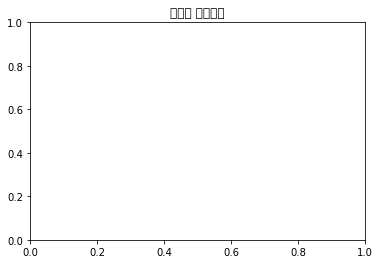

In [22]:
이용실적총계 = 이용실적.loc['총계']
plt.title("연도별 이용실적")
plt.plot(이용실적총계, linestyle="-", color="red", linewidth="10")
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,8)
plt.plot
plt.show()